<a href="https://colab.research.google.com/github/MC-Codingcat/NL-COVID-19-Data-Analysis/blob/main/NL_COVID_19_spatial_related_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NL COVID-19 Data Analysis**
<br/><br/>
# Summary  
This report presents an analysis of COVID-19 infections in the Netherlands. The report attempts to compare COVID data with spatial and socio-economic indicators (e.g., built density, average house value, sex, age) to explore the potential links between COVID infections and factors regarding the built environment and individuals' conditions.
###<br/><br/>
# Methodology
### 1. Data collection
The COVID infection data was obtained from RIVM (National Institute for Public Health and the Environment) and the regional (spatial) data from CBS (Statistics Netherlands). Both are public data sources in the Netherlands.
### 2. Exploratory Data Analysis (EDA)
Exploratory analysis techniques were applied to understand the dataset's structure, distributions, and basic statistics.
### 3. Data Cleaning / Wrangling
Data processing steps included handling missing values, data transformation and joining data tables based on key values (e.g., location).
### 4. Statistical Analysis
Statistical methods were used to analyze infection patterns and identify correlations.
### 5. Visualizations
Various visualizations were created to aid in understanding the data.

###<br/><br/>
##Loading data

In [ ]:
# data analysis and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for geographical and interactive plots
!pip install chart-studio
!pip install cufflinks
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline
cf.go_offline()

# allow reading data files from google drive
from google.colab import drive
drive.mount('/content/drive')

<br><br/>
#### Loading COVID data: num. of cases per municipality per day （accumulative)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/NL Covid-19 analysis/COVID-19_aantallen_gemeente_cumulatief.csv'
col_names_gmcum = ['Version', 'Date_of_report', 'Date_of_publication', 'Municipality_code', 'Municipality_name', 'Province', 'Total_reported', 'Hospital_admission', 'Deceased']
df_gmcum = pd.read_csv(path, sep = ';', header = 0, names = col_names_gmcum)
df_gmcum.head(3)

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
0,8,2020-03-13 10:00:00,2020-03-13 10:00:00,GM0003,Appingedam,Groningen,0,0,0
1,8,2020-03-13 10:00:00,2020-03-13 10:00:00,GM0010,Delfzijl,Groningen,0,0,0
2,8,2020-03-13 10:00:00,2020-03-13 10:00:00,GM0014,Groningen,Groningen,3,0,0


In [ ]:
df_gmcum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403206 entries, 0 to 403205
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Version              403206 non-null  int64 
 1   Date_of_report       403206 non-null  object
 2   Date_of_publication  403206 non-null  object
 3   Municipality_code    389421 non-null  object
 4   Municipality_name    389421 non-null  object
 5   Province             402789 non-null  object
 6   Total_reported       403206 non-null  int64 
 7   Hospital_admission   403206 non-null  int64 
 8   Deceased             403206 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 27.7+ MB


In [ ]:
df_gmcum.describe()

,Version,Total_reported,Hospital_admission,Deceased
count,403206.0,403206.000000,403206.000000,403206.000000
mean,8.0,10509.478726,3912.204283,832.594860
std,0.0,23978.530957,4842.704924,2690.152387
min,8.0,0.000000,0.000000,0.000000
25%,8.0,667.000000,25.000000,11.000000
50%,8.0,3830.000000,78.000000,28.000000
75%,8.0,12302.000000,9999.000000,61.000000
max,8.0,443708.000000,9999.000000,9999.000000


<br><br/>
#### Loading regional data (per province and per municipality)

In [ ]:
path_province = '/content/drive/MyDrive/Colab Notebooks/NL Covid-19 analysis/Regionale_kerncijfers.csv'
df_province = pd.read_csv(path_province, header = 0)
df_province.head(3)

,Regio's,Perioden,Population,homes per km²,Num. Business,"Num. Government, education and health services"
0,Groningen (PV),2021,586937,123,59420,10225
1,Groningen (PV),2022,590170,124,63610,10865
2,Groningen (PV),2023,596075,125,65470,11260


In [ ]:
df_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Regio's                                         36 non-null     object
 1   Perioden                                        36 non-null     int64 
 2   Population                                      36 non-null     int64 
 3   homes per km²                                   36 non-null     int64 
 4   Num. Business                                   36 non-null     int64 
 5   Num. Government, education and health services  36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [ ]:
df_province.describe()

,Perioden,Population,homes per km²,Num. Business,"Num. Government, education and health services"
count,36.000000,3.600000e+01,36.000000,36.000000,36.000000
mean,2022.000000,1.468816e+06,244.055556,187177.222222,30158.472222
std,0.828079,1.090525e+06,176.331335,152751.683163,23698.402653
min,2021.000000,3.854000e+05,85.000000,42800.000000,6560.000000
25%,2021.000000,5.657155e+05,119.000000,58751.250000,10128.750000
50%,2022.000000,1.147450e+06,172.000000,121710.000000,20645.000000
75%,2023.000000,2.243768e+06,290.500000,279875.000000,46420.000000
max,2023.000000,3.804906e+06,645.000000,504685.000000,84055.000000


In [ ]:
df_province.isnull().sum()

Regio's                                           0
Perioden                                          0
Population                                        0
homes per km²                                     0
Num. Business                                     0
Num. Government, education and health services    0
dtype: int64

In [ ]:
df_gemeenten = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NL Covid-19 analysis/Gemeenten_kerncijfers_2023.csv', sep=';', header = 0)
df_gemeenten.head()

,Municipality,Population,Residents per km²,Homes per km²,Num. all business,Num. Handel en horeca,"Num. Gov, Edu and Care",Surface area (km²)
0,Aa en Hunze,25724.0,93.0,41.0,3180.0,500.0,600.0,"278,87"
1,Aalburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalsmeer,33063.0,1645.0,670.0,5065.0,1040.0,580.0,"32,29"
3,Aalten,27244.0,282.0,126.0,2965.0,515.0,460.0,"97,05"
4,Ter Aar,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_gemeenten['Municipality'].nunique()

727

By 2023, there are 342 municipalities in the Netherlands. The table above contains way more rows (of "municipalities") than it should.

In [ ]:
df_gemeenten.dropna(subset=['Num. all business'])['Municipality'].nunique()

342

In [ ]:
df_gemeenten.dropna(subset=['Num. all business'], inplace=True)
df_gemeenten

,Municipality,Population,Residents per km²,Homes per km²,Num. all business,Num. Handel en horeca,"Num. Gov, Edu and Care",Surface area (km²)
0,Aa en Hunze,25724.0,93.0,41.0,3180.0,500.0,600.0,"278,87"
2,Aalsmeer,33063.0,1645.0,670.0,5065.0,1040.0,580.0,"32,29"
3,Aalten,27244.0,282.0,126.0,2965.0,515.0,460.0,"97,05"
7,Achtkarspelen,28149.0,275.0,120.0,3225.0,725.0,365.0,"103,98"
9,Alblasserdam,20356.0,2320.0,963.0,2355.0,455.0,320.0,"10,06"
...,...,...,...,...,...,...,...,...
720,Zundert,22518.0,187.0,82.0,3120.0,485.0,325.0,"121,21"
721,Zutphen,48510.0,1186.0,571.0,5985.0,1075.0,1495.0,"42,93"
722,Zwartewaterland,23368.0,284.0,112.0,2615.0,565.0,270.0,"87,86"
725,Zwijndrecht,45018.0,2217.0,1026.0,5000.0,835.0,810.0,"22,77"


<br><br/>
#### Cleaning the COVID data
1- Drop the rows with empty cells

In [ ]:
df_gmcum.isnull().sum()

Version                    0
Date_of_report             0
Date_of_publication        0
Municipality_code      13785
Municipality_name      13785
Province                 417
Total_reported             0
Hospital_admission         0
Deceased                   0
dtype: int64

In [ ]:
#check if the range of null values overlays
df_gmcum.dropna(subset=['Municipality_code']).isnull().sum()

Version                0
Date_of_report         0
Date_of_publication    0
Municipality_code      0
Municipality_name      0
Province               0
Total_reported         0
Hospital_admission     0
Deceased               0
dtype: int64

In [ ]:
#drop the cells without location info
df_gmcum.dropna(subset=['Municipality_code'], inplace=True)

<br><br/>
2- The value "9999" in the columns reporting num. of patients deceased/admitted into hospitals is weird and needs to be checked out. This can be caused by delayed registration of cases or a system setup issue.
<br><br/>

In [ ]:
df_gmcum[df_gmcum['Hospital_admission']==9999]

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
246964,8,2022-01-18 10:00:00,2022-01-18 10:00:00,GM0014,Groningen,Groningen,37282,9999,63
246965,8,2022-01-18 10:00:00,2022-01-18 10:00:00,GM0034,Almere,Flevoland,44802,9999,124
246966,8,2022-01-18 10:00:00,2022-01-18 10:00:00,GM0037,Stadskanaal,Groningen,5226,9999,23
246967,8,2022-01-18 10:00:00,2022-01-18 10:00:00,GM0047,Veendam,Groningen,3871,9999,19
246968,8,2022-01-18 10:00:00,2022-01-18 10:00:00,GM0050,Zeewolde,Flevoland,4001,9999,17
...,...,...,...,...,...,...,...,...,...
403188,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1979,Eemsdelta,Groningen,18120,9999,9999
403189,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1980,Dijk en Waard,Noord-Holland,42413,9999,9999
403190,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1982,Land van Cuijk,Noord-Brabant,49355,9999,9999
403191,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1991,Maashorst,Noord-Brabant,30200,9999,9999


In [ ]:
df_gmcum[df_gmcum['Deceased']==9999]

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
371256,8,2023-01-03 10:00:00,2023-01-01 10:00:00,GM0014,Groningen,Groningen,110033,9999,9999
371257,8,2023-01-03 10:00:00,2023-01-01 10:00:00,GM0034,Almere,Flevoland,98656,9999,9999
371258,8,2023-01-03 10:00:00,2023-01-01 10:00:00,GM0037,Stadskanaal,Groningen,13553,9999,9999
371259,8,2023-01-03 10:00:00,2023-01-01 10:00:00,GM0047,Veendam,Groningen,11730,9999,9999
371260,8,2023-01-03 10:00:00,2023-01-01 10:00:00,GM0050,Zeewolde,Flevoland,10583,9999,9999
...,...,...,...,...,...,...,...,...,...
403188,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1979,Eemsdelta,Groningen,18120,9999,9999
403189,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1980,Dijk en Waard,Noord-Holland,42413,9999,9999
403190,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1982,Land van Cuijk,Noord-Brabant,49355,9999,9999
403191,8,2023-03-31 10:00:00,2023-03-31 10:00:00,GM1991,Maashorst,Noord-Brabant,30200,9999,9999


<br><br/>
It is unlikely that the municipalities all have 9999 admissions to hospitals and deceased patients within one day (even if the data is accumulative and there might be a delayed registration). Let's check the data of the days right before the appearance of the value 9999, and the total number of cases compared to the latest data.
<br><br/>

In [ ]:
df_gmcum[df_gmcum['Date_of_publication']=='2022-01-17 10:00:00']

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
246600,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM0014,Groningen,Groningen,36896,142,63
246601,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM0034,Almere,Flevoland,44409,456,124
246602,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM0037,Stadskanaal,Groningen,5213,41,23
246603,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM0047,Veendam,Groningen,3854,21,19
246604,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM0050,Zeewolde,Flevoland,3970,27,17
...,...,...,...,...,...,...,...,...,...
246947,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM1966,Het Hogeland,Groningen,8129,51,37
246948,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM1969,Westerkwartier,Groningen,8548,47,36
246949,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM1970,Noardeast-Fryslân,Fryslân,8846,86,57
246950,8,2022-01-17 10:00:00,2022-01-17 10:00:00,GM1978,Molenlanden,Zuid-Holland,11365,65,44


In [ ]:
df_gmcum[df_gmcum['Date_of_publication']=='2022-12-31 10:00:00']

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
370901,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM0014,Groningen,Groningen,110020,9999,81
370902,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM0034,Almere,Flevoland,98654,9999,133
370903,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM0037,Stadskanaal,Groningen,13552,9999,25
370904,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM0047,Veendam,Groningen,11728,9999,20
370905,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM0050,Zeewolde,Flevoland,10582,9999,20
...,...,...,...,...,...,...,...,...,...
371238,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM1979,Eemsdelta,Groningen,18042,9999,32
371239,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM1980,Dijk en Waard,Noord-Holland,42238,9999,77
371240,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM1982,Land van Cuijk,Noord-Brabant,49113,9999,142
371241,8,2023-01-03 10:00:00,2022-12-31 10:00:00,GM1991,Maashorst,Noord-Brabant,30077,9999,128


In [ ]:
df_gmcum[df_gmcum['Date_of_publication']=='2022-12-31 10:00:00']['Deceased'].sum()

22940

It can be seen from the tables that the data in the columns "Total_reported", "Hospital_admission", and "Deceased" are all accumulative. The accumulative death toll in October 2023 is 22992, so the data of 31-12-2022 is likely correct. Likewise, the last valid data of the number of admissions is the data of 17-01-2022. For some reason, the data afterward is lost. The data of total reported cases, however, is all valid in the dataset.
<br><br/>

In [ ]:
#change "9999" to "NaN"
df_gmcum['Hospital_admission'].replace(9999, np.nan , inplace=True)
df_gmcum['Deceased'].replace(9999, np.nan , inplace=True)

In [ ]:
#construct a dataframe for analysis and plots
df_gm_total = df_gmcum[df_gmcum['Date_of_publication']=='2023-03-31 10:00:00']
df_gm_total.drop(['Version','Date_of_report','Hospital_admission','Deceased'],axis=1,inplace=True)
df_dec = df_gmcum[df_gmcum['Date_of_publication']=='2022-12-31 10:00:00'][['Municipality_code','Deceased']]
df_gm_total = pd.merge(df_gm_total, df_dec, on='Municipality_code')
df_gm_total.rename({'Deceased' : 'Deceased_till_2022'},axis='columns',inplace=True)

In [ ]:
df_gm_total['Deceased_till_2022'].sum()

22940.0

In [ ]:
df_gm_total

,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Deceased_till_2022
0,2023-03-31 10:00:00,GM0014,Groningen,Groningen,110430,81.0
1,2023-03-31 10:00:00,GM0034,Almere,Flevoland,98978,133.0
2,2023-03-31 10:00:00,GM0037,Stadskanaal,Groningen,13615,25.0
3,2023-03-31 10:00:00,GM0047,Veendam,Groningen,11773,20.0
4,2023-03-31 10:00:00,GM0050,Zeewolde,Flevoland,10615,20.0
...,...,...,...,...,...,...
337,2023-03-31 10:00:00,GM1979,Eemsdelta,Groningen,18120,32.0
338,2023-03-31 10:00:00,GM1980,Dijk en Waard,Noord-Holland,42413,77.0
339,2023-03-31 10:00:00,GM1982,Land van Cuijk,Noord-Brabant,49355,142.0
340,2023-03-31 10:00:00,GM1991,Maashorst,Noord-Brabant,30200,128.0


By 2023 there are indeed 342 *gemeenten* (municipalities) in the Netherlands. The death toll data also makes sense.

<br><br/>
## Exploratory Data Analysis (EDA)

In [ ]:
df_gm_total.describe()

,Total_reported,Deceased_till_2022,Mortality_rate
count,342.000000,342.000000,342.000000
mean,24936.461988,67.076023,0.002742
std,37003.290802,105.988159,0.001121
min,279.000000,0.000000,0.000000
25%,10589.500000,27.000000,0.001978
50%,15435.500000,44.000000,0.002535
75%,25193.500000,76.250000,0.003302
max,443708.000000,1185.000000,0.007168


* Let's check out the municipality where no one dies from COVID until the end of 2022.

In [ ]:
df_gm_total[df_gm_total['Deceased_till_2022']==0]

,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Deceased_till_2022,Mortality_rate
70,2023-03-31 10:00:00,GM0277,Rozendaal,Gelderland,942,0.0,0.0


In [ ]:
df_gemeenten[df_gemeenten['Municipality']=='Rozendaal']

,Municipality,Population,Residents per km²,Homes per km²,Num. all business,Num. Handel en horeca,"Num. Gov, Edu and Care",Surface area (km²)
528,Rozendaal,1754.0,63.0,25.0,295.0,20.0,70.0,"27,92"


Congratulations Rozendaal.



*  The municipalities with the most reported cases




In [ ]:
df_gm_total.nlargest(5,['Total_reported'])

,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Deceased_till_2022
106,2023-03-31 10:00:00,GM0363,Amsterdam,Noord-Holland,443708,1127.0
164,2023-03-31 10:00:00,GM0599,Rotterdam,Zuid-Holland,318211,1185.0
147,2023-03-31 10:00:00,GM0518,'s-Gravenhage,Zuid-Holland,245475,686.0
96,2023-03-31 10:00:00,GM0344,Utrecht,Utrecht,197884,327.0
222,2023-03-31 10:00:00,GM0855,Tilburg,Noord-Brabant,116242,310.0


* The municipalities with the most deceased cases

In [ ]:
df_gm_total.nlargest(5,['Deceased_till_2022'])

,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Deceased_till_2022
164,2023-03-31 10:00:00,GM0599,Rotterdam,Zuid-Holland,318211,1185.0
106,2023-03-31 10:00:00,GM0363,Amsterdam,Noord-Holland,443708,1127.0
147,2023-03-31 10:00:00,GM0518,'s-Gravenhage,Zuid-Holland,245475,686.0
201,2023-03-31 10:00:00,GM0772,Eindhoven,Noord-Brabant,113626,451.0
96,2023-03-31 10:00:00,GM0344,Utrecht,Utrecht,197884,327.0


* The Municipalities with the highest mortality rate

In [ ]:
df_gm_total['Mortality_rate'] = df_gm_total.apply(lambda row: row.Deceased_till_2022/row.Total_reported, axis=1)
df_gm_total

,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Deceased_till_2022,Mortality_rate
0,2023-03-31 10:00:00,GM0014,Groningen,Groningen,110430,81.0,0.000733
1,2023-03-31 10:00:00,GM0034,Almere,Flevoland,98978,133.0,0.001344
2,2023-03-31 10:00:00,GM0037,Stadskanaal,Groningen,13615,25.0,0.001836
3,2023-03-31 10:00:00,GM0047,Veendam,Groningen,11773,20.0,0.001699
4,2023-03-31 10:00:00,GM0050,Zeewolde,Flevoland,10615,20.0,0.001884
...,...,...,...,...,...,...,...
337,2023-03-31 10:00:00,GM1979,Eemsdelta,Groningen,18120,32.0,0.001766
338,2023-03-31 10:00:00,GM1980,Dijk en Waard,Noord-Holland,42413,77.0,0.001815
339,2023-03-31 10:00:00,GM1982,Land van Cuijk,Noord-Brabant,49355,142.0,0.002877
340,2023-03-31 10:00:00,GM1991,Maashorst,Noord-Brabant,30200,128.0,0.004238


In [ ]:
df_gm_total.nlargest(5,['Mortality_rate'])

,Date_of_publication,Municipality_code,Municipality_name,Province,Total_reported,Deceased_till_2022,Mortality_rate
12,2023-03-31 10:00:00,GM0088,Schiermonnikoog,Fryslân,279,2.0,0.007168
136,2023-03-31 10:00:00,GM0473,Zandvoort,Noord-Holland,7336,51.0,0.006952
246,2023-03-31 10:00:00,GM0981,Vaals,Limburg,3599,25.0,0.006946
125,2023-03-31 10:00:00,GM0417,Laren,Noord-Holland,5154,32.0,0.006209
279,2023-03-31 10:00:00,GM1706,Cranendonck,Noord-Brabant,10057,62.0,0.006165


<Axes: xlabel='Total_reported', ylabel='Density'>

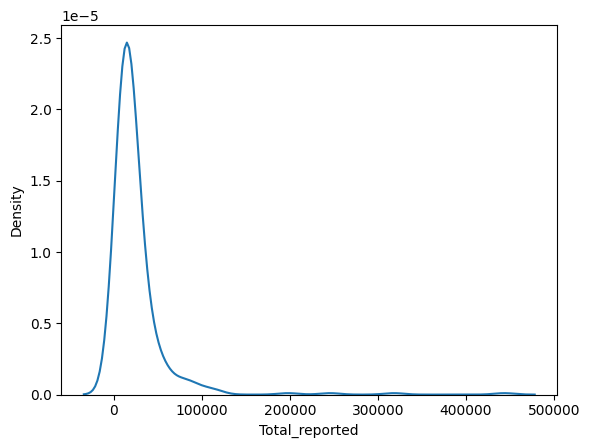

In [ ]:
sns.kdeplot(df_gm_total['Total_reported'])

In [ ]:
df_gm_total.groupby('Provicne').sum()

KeyError: ignored

In [ ]:
sns.boxplot ( x = 'Province' , y = 'numerical col', data = df, hue = 'smoker' )

Scatter plot of total cases and deceased cases per municipality

The trend of the growth of reported cases over time

Exploratory pair plot (gm_total)

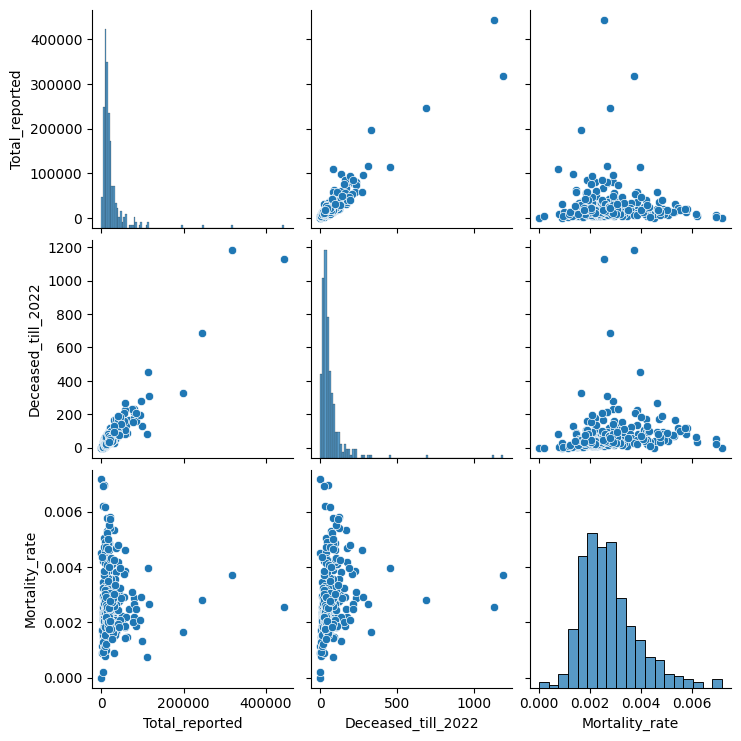

In [ ]:
sns.pairplot(df_gm_total)